<a href="https://colab.research.google.com/github/ReshmaAjil/Breast-Cancer-detection/blob/main/SVM_Classification_by_sleep__study_hours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# Step 1: Create realistic dataset
# -----------------------------
np.random.seed(42)
n_samples = 300

study_hours = np.random.normal(loc=6, scale=2, size=n_samples)
sleep_hours = np.random.normal(loc=7, scale=1.5, size=n_samples)

# Decision rule with noise
score = study_hours + 0.7 * sleep_hours
prob = 1 / (1 + np.exp(-(score - 10)))

label = (prob > 0.5).astype(int)

# Add noise (realistic)
noise_idx = np.random.choice(n_samples, size=int(0.1 * n_samples), replace=False)
label[noise_idx] = 1 - label[noise_idx]

# Create DataFrame
df = pd.DataFrame({
    "Study_Hours": study_hours,
    "Sleep_Hours": sleep_hours,
    "Pass_Exam": label
})

print(df.head())
print(df["Pass_Exam"].value_counts())

# -----------------------------
# Step 2: Prepare data
# -----------------------------
X = df.drop("Pass_Exam", axis=1)
y = df["Pass_Exam"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------
# Step 3: Train SVM (balanced)
# -----------------------------
svm_model = SVC(
    kernel="linear",
    class_weight="balanced",
    random_state=42
)

svm_model.fit(X_train, y_train)

# -----------------------------
# Step 4: Evaluate model
# -----------------------------
y_pred = svm_model.predict(X_test)

print("AccuracyScore is :", accuracy_score(y_test, y_pred))
print("Classification_report is :\n", classification_report(y_test, y_pred))
print("Confusion Matrix is :\n", confusion_matrix(y_test, y_pred))

   Study_Hours  Sleep_Hours  Pass_Exam
0     6.993428     5.756507          1
1     5.723471     6.159728          1
2     7.295377     8.120940          0
3     9.046060     7.915555          1
4     5.531693     6.968648          1
Pass_Exam
1    185
0    115
Name: count, dtype: int64
AccuracyScore is : 0.8166666666666667
Classification_report is :
               precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.83      0.85      0.84        34

    accuracy                           0.82        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

Confusion Matrix is :
 [[20  6]
 [ 5 29]]


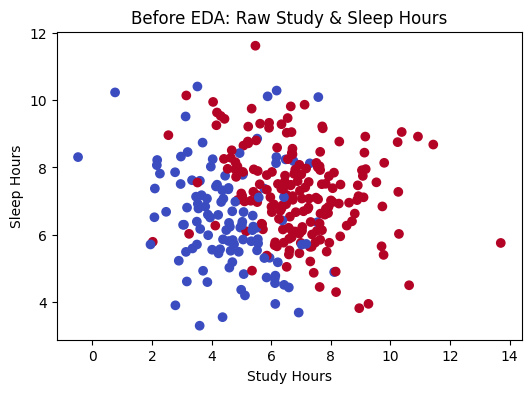

In [4]:
#visualization before EDA
plt.figure(figsize=(6,4))
plt.scatter(
    df["Study_Hours"],
    df["Sleep_Hours"],
    c=df["Pass_Exam"],
    cmap="coolwarm"
)

plt.title("Before EDA: Raw Study & Sleep Hours")
plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.show()

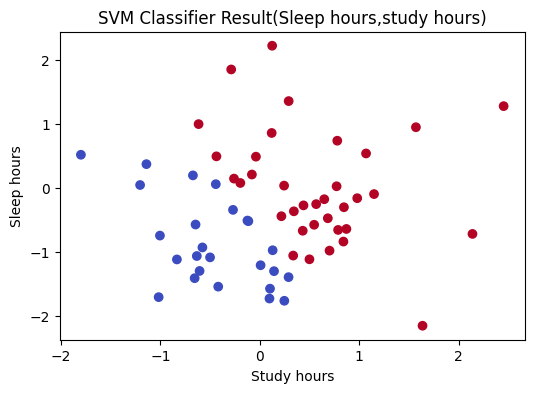

In [6]:
#Plot scatter plot after EDA
plt.figure(figsize=(6,4))
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='coolwarm')
plt.title("SVM Classifier Result(Sleep hours,study hours)")
plt.xlabel("Study hours")
plt.ylabel("Sleep hours")
plt.show()